In [1]:
#Import all relevant libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Loading the data
*converts the CSV file into a Pandas dataframe.*

In [3]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('archive (21)/final_data.csv')

### *Viewing the dataframe*


In [4]:
df.shape

(10754, 22)

In [5]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [6]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

### *there is no null and this a little bit weird*.... we may check it later

In [7]:
df.value_counts()

player                                     team                    name                position                    height  age   appearance  goals     assists   yellow cards  second yellow cards  red cards  goals conceded  clean sheets  minutes played  days_injured  games_injured  award  current_value  highest_value  position_encoded  winger
/aaron-appindangoye/profil/spieler/254249  Sivasspor               Aaron Appindangoyé  Defender Centre-Back        184.0   31.0  35          0.067014  0.033507  0.067014      0.000000             0.000000   0.000000        0.000000      2686            436           74             1      750000         1800000        2                 0         1
/mohamed-bouchouari/profil/spieler/546225  FC Emmen                Mohamed Bouchouari  Defender Right-Back         170.0   22.0  34          0.076596  0.076596  0.114894      0.000000             0.000000   0.000000        0.000000      2350            6             1              0      500000         500

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [8]:
df.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


#### *lets see if there is outliers in prices*

In [9]:
prices=df['current_value']

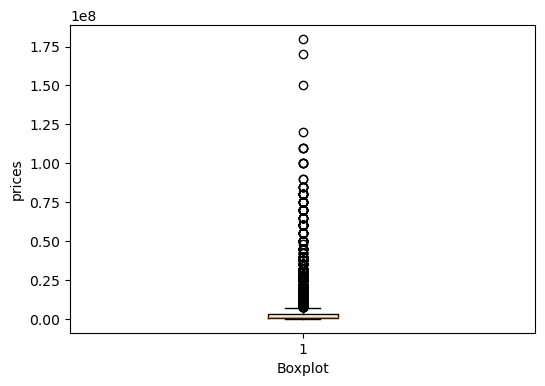

In [10]:
plt.figure(figsize=(6,4))
plt.boxplot(prices)
plt.xlabel('Boxplot')
plt.ylabel('prices')
plt.show()

In [11]:
prices.describe()

count    1.075400e+04
mean     3.622971e+06
std      9.095410e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      3.000000e+06
max      1.800000e+08
Name: current_value, dtype: float64

## **before we start let us change the unit of current price to more readable unit,**
## **so we will make it a Kilo unit**

In [12]:
df.rename(columns={'current_value':'current_value_K'}, inplace=True)

In [13]:
df['current_value_K']=df['current_value_K']/1000

In [14]:
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value_K,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000.0,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500.0,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600.0,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000.0,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000.0,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75.0,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300.0,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50.0,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50.0,50000,4,0


### *clearly there is alot of outliers!!*
##### *the Quritles 1 2 and 3 prices are between 300K and 3M , then we have alot of values are above that until we reach 180 M*

### And when we search about the dataset, we find that its from :
##### *11 European leagues, England, Germany, Spain, Italy, France, Netherlands,Portugal, Russia, Turkey,Austria.*

##### *4 American leagues, Brazil, United States, Argentina, Mexico.*

##### *1 African league, South Africa.*

##### *4 Asian leagues, Japan, Saudi Arabia, South Korea, Australia.*

#### *so we assume that the differnces between regions markets may cause the outliers in prices*



#### *here we will categorize players based on their league and country;*
#### *so we need to categorize all teams*

In [22]:
# df['team'].unique()

In [23]:
# # Lists for each region
# america = [
#     'Club Athletico Paranaense', 'Red Bull Bragantino', 'Santos FC',
#     'Clube de Regatas Vasco da Gama', 'Fluminense Football Club', 'Sport Club Internacional',
#     'Esporte Clube Bahia', 'Grêmio Foot-Ball Porto Alegrense', 'Coritiba Foot Ball Club',
#     'Fortaleza Esporte Clube', 'Cruzeiro Esporte Clube', 'Goiás Esporte Clube',
#     'Cuiabá Esporte Clube (MT)', 'Botafogo de Futebol e Regatas', 'Clube Atlético Mineiro',
#     'São Paulo Futebol Clube', 'América Futebol Clube (MG)', 'Sociedade Esportiva Palmeiras',
#     'CR Flamengo', 'Sport Club Corinthians Paulista', 'Santos Laguna', 'Club León FC',
#     'FC Juárez', 'Club Tijuana', 'Atlético de San Luis', 'Club Necaxa', 'Puebla FC',
#     'Mazatlán FC', 'Querétaro FC', 'CF América', 'CF Monterrey', 'Atlas Guadalajara',
#     'UNAM Pumas', 'Deportivo Toluca', 'Tigres UANL', 'Deportivo Guadalajara', 'CD Cruz Azul',
#     'CF Pachuca', 'Philadelphia Union', 'FC Cincinnati', 'FC Dallas', 'Orlando City SC',
#     'Los Angeles Galaxy', 'New England Revolution', 'D.C. United', 'New York Red Bulls',
#     'Portland Timbers', 'Columbus Crew', 'Charlotte FC', 'Sporting Kansas City',
#     'Colorado Rapids', 'Vancouver Whitecaps FC', 'Chicago Fire FC', 'Inter Miami CF',
#     'Minnesota United FC', 'Houston Dynamo FC', 'St. Louis CITY SC', 'CF Montréal',
#     'Real Salt Lake City', 'Nashville SC', 'San Jose Earthquakes', 'Seattle Sounders FC',
#     'Atlanta United FC', 'New York City FC', 'Austin FC', 'Los Angeles FC', 'Toronto FC',
#     'CA Vélez Sarsfield', 'CA San Lorenzo de Almagro', 'Club Atlético Lanús', 'Defensa y Justicia',
#     'Club Estudiantes de La Plata', "CA Newell's Old Boys", 'CA Colon', 'CA Rosario Central',
#     'CA Banfield', 'Club de Gimnasia y Esgrima La Plata', 'Club Atlético Tucumán',
#     'CD Godoy Cruz Antonio Tomba', 'Club Atlético Unión', 'Club Atlético Platense',
#     'Instituto AC Córdoba', 'CA Sarmiento (Junin)', 'CA Central Córdoba (SdE)',
#     'CA Barracas Central', 'Arsenal Fútbol Club', 'Club Atlético Talleres', 'Club Atlético Belgrano',
#     'AA Argentinos Juniors', 'CA Independiente', 'Club Atlético Tigre', 'CA River Plate',
#     'CA Boca Juniors', 'CA Huracán', 'Racing Club'
# ]

# asia1 = [
#     'Kawasaki Frontale', 'Yokohama F. Marinos', 'Cerezo Osaka', 'Kyoto Sanga', 'FC Tokyo',
#     'Nagoya Grampus', 'Kashiwa Reysol', 'Yokohama FC', 'Avispa Fukuoka', 'Sagan Tosu',
#     'Vissel Kobe', 'Hokkaido Consadole Sapporo', 'Shonan Bellmare', 'Albirex Niigata',
#     'Kashima Antlers', 'Sanfrecce Hiroshima', 'Urawa Red Diamonds', 'Gamba Osaka',
#     'Al-Shabab Club (Riyadh)', 'Ettifaq FC', 'Al-Taawoun FC', 'Al-Wehda FC', 'Damac FC',
#     'Al-Tai', 'Al-Fayha FC', 'Abha Club', 'Al-Khaleej', 'Al-Raed SFC', 'Al-Batin FC',
#     'Al-Adalah FC', 'Al-Ittihad Club (Jeddah)', 'Al-Fateh SC', 'Al-Hilal Saudi FC', 'Al-Nassr FC',
#     'Suwon Samsung Bluewings', 'Jeju United', 'Incheon United', 'Gangwon FC', 'Daejeon Hana Citizen',
#     'Gwangju FC', 'Daegu FC', 'Suwon FC', 'Pohang Steelers', 'FC Seoul', 'Jeonbuk Hyundai Motors',
#     'Ulsan Hyundai', 'Melbourne Victory', 'Western United FC', 'Newcastle United Jets',
#     'Perth Glory', 'Macarthur FC', 'Brisbane Roar', 'Central Coast Mariners', 'Wellington Phoenix',
#     'Melbourne City FC', 'Sydney FC', 'Adelaide United', 'Western Sydney Wanderers'
# ]

# africa = [
#     'Sekhukhune United FC', 'AmaZulu FC', 'Lamontville Golden Arrows', 'Stellenbosch FC',
#     'Swallows FC', 'Maritzburg United FC', 'Royal AM FC', 'TS Galaxy FC', 'Richards Bay FC',
#     'Marumo Gallants FC', 'Cape Town City FC', 'Orlando Pirates', 'SuperSport United',
#     'Chippa United', 'Mamelodi Sundowns FC', 'Kaizer Chiefs'
# ]

# europe = [
#     'Manchester United', 'West Ham United', 'Leicester City', 'Aston Villa', 'Wolverhampton Wanderers',
#     'Southampton FC', 'Brighton & Hove Albion', 'Everton FC', 'Nottingham Forest', 'Leeds United',
#     'Crystal Palace', 'Fulham FC', 'AFC Bournemouth', 'Brentford FC', 'Liverpool FC',
#     'Newcastle United', 'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
#     'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim', '1.FC Union Berlin',
#     'FC Augsburg', 'VfB Stuttgart', '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
#     'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt', 'SC Freiburg', 'Borussia Dortmund',
#     'Bayer 04 Leverkusen', 'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
#     'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF', 'Sevilla FC', 'Celta de Vigo',
#     'CA Osasuna', 'Girona FC', 'Rayo Vallecano', 'RCD Mallorca', 'UD Almería', 'Real Valladolid CF',
#     'Cádiz CF', 'Elche CF', 'RCD Espanyol Barcelona', 'Getafe CF', 'Atlético de Madrid', 'Real Madrid',
#     'FC Barcelona', 'AS Roma', 'SS Lazio', 'ACF Fiorentina', 'US Sassuolo', 'Torino FC', 'Udinese Calcio',
#     'Bologna FC 1909', 'AC Monza', 'FC Empoli', 'US Lecce', 'Spezia Calcio', 'Hellas Verona', 'UC Sampdoria',
#     'US Cremonese', 'US Salernitana 1919', 'Atalanta BC', 'SSC Napoli', 'Inter Milan', 'AC Milan',
#     'Juventus FC', 'AS Monaco', 'Stade Rennais FC', 'Olympique Marseille', 'OGC Nice', 'RC Lens',
#     'FC Nantes', 'Montpellier HSC', 'FC Lorient', 'FC Toulouse', 'ESTAC Troyes', 'Stade Brestois 29',
#     'Angers SCO', 'AJ Auxerre', 'Clermont Foot 63', 'AC Ajaccio', 'Olympique Lyon', 'LOSC Lille',
#     'Stade Reims', 'RC Strasbourg Alsace', 'Paris Saint-Germain', 'AZ Alkmaar', 'Twente Enschede FC',
#     'Vitesse Arnhem', 'FC Groningen', 'Fortuna Sittard', 'NEC Nijmegen', 'Sparta Rotterdam',
#     'SC Cambuur Leeuwarden', 'Excelsior Rotterdam', 'FC Volendam', 'RKC Waalwijk', 'FC Emmen',
#     'Go Ahead Eagles', 'FC Utrecht', 'SC Heerenveen', 'Ajax Amsterdam', 'PSV Eindhoven',
#     'Feyenoord Rotterdam', 'SC Braga', 'FC Famalicão', 'Vitória Guimarães SC', 'CD Santa Clara',
#     'GD Estoril Praia', 'Boavista FC', 'Portimonense SC', 'CS Marítimo', 'Casa Pia AC', 'FC Paços de Ferreira',
#     'FC Arouca', 'FC Vizela', 'Rio Ave FC', 'GD Chaves', 'Gil Vicente FC', 'FC Porto', 'Sporting CP',
#     'SL Benfica', 'Dynamo Moscow', 'Lokomotiv Moscow', 'FK Rostov', 'Krylya Sovetov Samara', 'FC Sochi',
#     'Akhmat Grozny', 'Ural Yekaterinburg', 'FK Orenburg', 'FC Pari Nizhniy Novgorod', 'FK Khimki',
#     'Torpedo Moscow', 'Fakel Voronezh', 'Spartak Moscow', 'CSKA Moscow', 'FK Krasnodar', 'Zenit St. Petersburg',
#     'West Bromwich Albion', 'Sunderland AFC', 'Hull City', 'Preston North End', 'Stoke City', 'Queens Park Rangers',
#     'Birmingham City', 'Cardiff City', 'Millwall FC', 'Reading FC', 'Blackpool FC', 'Bristol City',
#     'Huddersfield Town', 'Rotherham United', 'Wigan Athletic', 'Middlesbrough FC', 'Coventry City', 'Luton Town',
#     'Swansea City', 'Burnley FC', 'Watford FC', 'Sheffield United', 'Blackburn Rovers', 'Norwich City', 'Trabzonspor',
#     'Besiktas JK', 'Basaksehir FK', 'Antalyaspor', 'Adana Demirspor', 'Alanyaspor', 'Kasimpasa', 'Konyaspor',
#     'MKE Ankaragücü', 'Sivasspor', 'Kayserispor', 'Giresunspor', 'Istanbulspor', 'Hatayspor', 'Gaziantep FK',
#     'Fatih Karagümrük', 'Ümraniyespor', 'Fenerbahce', 'Galatasaray', 'SK Sturm Graz', 'LASK', 'SCR Altach',
#     'SC Austria Lustenau', 'SV Ried', 'TSV Hartberg', 'WSG Tirol', 'Rapid Vienna', 'Austria Vienna',
#     'SK Austria Klagenfurt', 'Wolfsberger AC', 'Red Bull Salzburg'
# ]


In [26]:
# # Printing the lists
# print("America:", len(america))
# print("Asia:", len(asia1))
# print("Africa:", len(africa))
# print("Europe:", len(europe))


In [20]:

team_region_mapping = {
    'Manchester United': 'Europe',
    'West Ham United': 'Europe',
    'Leicester City': 'Europe',
    'Aston Villa': 'Europe',
    'Wolverhampton Wanderers': 'Europe',
    'Southampton FC': 'Europe',
    'Brighton & Hove Albion': 'Europe',
    'Everton FC': 'Europe',
    'Nottingham Forest': 'Europe',
    'Leeds United': 'Europe',
    'Crystal Palace': 'Europe',
    'Fulham FC': 'Europe',
    'AFC Bournemouth': 'Europe',
    'Brentford FC': 'Europe',
    'Liverpool FC': 'Europe',
    'Newcastle United': 'Europe',
    'Manchester City': 'Europe',
    'Arsenal FC': 'Europe',
    'Tottenham Hotspur': 'Europe',
    'Chelsea FC': 'Europe',
    'Borussia Mönchengladbach': 'Europe',
    'VfL Wolfsburg': 'Europe',
    'TSG 1899 Hoffenheim': 'Europe',
    '1.FC Union Berlin': 'Europe',
    'FC Augsburg': 'Europe',
    'VfB Stuttgart': 'Europe',
    '1.FSV Mainz 05': 'Europe',
    '1.FC Köln': 'Europe',
    'Hertha BSC': 'Europe',
    'FC Schalke 04': 'Europe',
    'VfL Bochum': 'Europe',
    'SV Werder Bremen': 'Europe',
    'Eintracht Frankfurt': 'Europe',
    'SC Freiburg': 'Europe',
    'Borussia Dortmund': 'Europe',
    'Bayer 04 Leverkusen': 'Europe',
    'Bayern Munich': 'Europe',
    'RB Leipzig': 'Europe',
    'Real Sociedad': 'Europe',
    'Villarreal CF': 'Europe',
    'Real Betis Balompié': 'Europe',
    'Athletic Bilbao': 'Europe',
    'Valencia CF': 'Europe',
    'Sevilla FC': 'Europe',
    'Celta de Vigo': 'Europe',
    'CA Osasuna': 'Europe',
    'Girona FC': 'Europe',
    'Rayo Vallecano': 'Europe',
    'RCD Mallorca': 'Europe',
    'UD Almería': 'Europe',
    'Real Valladolid CF': 'Europe',
    'Cádiz CF': 'Europe',
    'Elche CF': 'Europe',
    'RCD Espanyol Barcelona': 'Europe',
    'Getafe CF': 'Europe',
    'Atlético de Madrid': 'Europe',
    'Real Madrid': 'Europe',
    'FC Barcelona': 'Europe',
    'AS Roma': 'Europe',
    'SS Lazio': 'Europe',
    'ACF Fiorentina': 'Europe',
    'US Sassuolo': 'Europe',
    'Torino FC': 'Europe',
    'Udinese Calcio': 'Europe',
    'Bologna FC 1909': 'Europe',
    'AC Monza': 'Europe',
    'FC Empoli': 'Europe',
    'US Lecce': 'Europe',
    'Spezia Calcio': 'Europe',
    'Hellas Verona': 'Europe',
    'UC Sampdoria': 'Europe',
    'US Cremonese': 'Europe',
    'US Salernitana 1919': 'Europe',
    'Atalanta BC': 'Europe',
    'SSC Napoli': 'Europe',
    'Inter Milan': 'Europe',
    'AC Milan': 'Europe',
    'Juventus FC': 'Europe',
    'AS Monaco': 'Europe',
    'Stade Rennais FC': 'Europe',
    'Olympique Marseille': 'Europe',
    'OGC Nice': 'Europe',
    'RC Lens': 'Europe',
    'FC Nantes': 'Europe',
    'Montpellier HSC': 'Europe',
    'FC Lorient': 'Europe',
    'FC Toulouse': 'Europe',
    'ESTAC Troyes': 'Europe',
    'Stade Brestois 29': 'Europe',
    'Angers SCO': 'Europe',
    'AJ Auxerre': 'Europe',
    'Clermont Foot 63': 'Europe',
    'AC Ajaccio': 'Europe',
    'Olympique Lyon': 'Europe',
    'LOSC Lille': 'Europe',
    'Stade Reims': 'Europe',
    'RC Strasbourg Alsace': 'Europe',
    'Paris Saint-Germain': 'Europe',
    'AZ Alkmaar': 'Europe',
    'Twente Enschede FC': 'Europe',
    'Vitesse Arnhem': 'Europe',
    'FC Groningen': 'Europe',
    'Fortuna Sittard': 'Europe',
    'NEC Nijmegen': 'Europe',
    'Sparta Rotterdam': 'Europe',
    'SC Cambuur Leeuwarden': 'Europe',
    'Excelsior Rotterdam': 'Europe',
    'FC Volendam': 'Europe',
    'RKC Waalwijk': 'Europe',
    'FC Emmen': 'Europe',
    'Go Ahead Eagles': 'Europe',
    'FC Utrecht': 'Europe',
    'SC Heerenveen': 'Europe',
    'Ajax Amsterdam': 'Europe',
    'PSV Eindhoven': 'Europe',
    'Feyenoord Rotterdam': 'Europe',
    'Dynamo Moscow': 'Europe',
    'Lokomotiv Moscow': 'Europe',
    'FK Rostov': 'Europe',
    'Krylya Sovetov Samara': 'Europe',
    'FC Sochi': 'Europe',
    'Akhmat Grozny': 'Europe',
    'Ural Yekaterinburg': 'Europe',
    'FK Orenburg': 'Europe',
    'FC Pari Nizhniy Novgorod': 'Europe',
    'FK Khimki': 'Europe',
    'Torpedo Moscow': 'Europe',
    'Fakel Voronezh': 'Europe',
    'Spartak Moscow': 'Europe',
    'CSKA Moscow': 'Europe',
    'FK Krasnodar': 'Europe',
    'Zenit St. Petersburg': 'Europe',
    'West Bromwich Albion': 'Europe',
    'Sunderland AFC': 'Europe',
    'Hull City': 'Europe',
    'Preston North End': 'Europe',
    'Stoke City': 'Europe',
    'Queens Park Rangers': 'Europe',
    'Birmingham City': 'Europe',
    'Cardiff City': 'Europe',
    'Millwall FC': 'Europe',
    'Reading FC': 'Europe',
    'Blackpool FC': 'Europe',
    'Bristol City': 'Europe',
    'Huddersfield Town': 'Europe',
    'Rotherham United': 'Europe',
    'Wigan Athletic': 'Europe',
    'Middlesbrough FC': 'Europe',
    'Coventry City': 'Europe',
    'Luton Town': 'Europe',
    'Swansea City': 'Europe',
    'Burnley FC': 'Europe',
    'Watford FC': 'Europe',
    'Sheffield United': 'Europe',
    'Blackburn Rovers': 'Europe',
    'Norwich City': 'Europe',
    'Trabzonspor': 'Europe',
    'Besiktas JK': 'Europe',
    'Basaksehir FK': 'Europe',
    'Antalyaspor': 'Europe',
    'Adana Demirspor': 'Europe',
    'Alanyaspor': 'Europe',
    'Kasimpasa': 'Europe',
    'Konyaspor': 'Europe',
    'MKE Ankaragücü': 'Europe',
    'Sivasspor': 'Europe',
    'Kayserispor': 'Europe',
    'Giresunspor': 'Europe',
    'Istanbulspor': 'Europe',
    'Hatayspor': 'Europe',
    'Gaziantep FK': 'Europe',
    'Fatih Karagümrük': 'Europe',
    'Ümraniyespor': 'Europe',
    'Fenerbahce': 'Europe',
    'Galatasaray': 'Europe',
    'SK Sturm Graz': 'Europe',
    'LASK': 'Europe',
    'SCR Altach': 'Europe',
    'SC Austria Lustenau': 'Europe',
    'SV Ried': 'Europe',
    'TSV Hartberg': 'Europe',
    'WSG Tirol': 'Europe',
    'Rapid Vienna': 'Europe',
    'Austria Vienna': 'Europe',
    'SK Austria Klagenfurt': 'Europe',
    'Wolfsberger AC': 'Europe',
    'Red Bull Salzburg': 'Europe',
    'Philadelphia Union': 'America',
    'FC Cincinnati': 'America',
    'FC Dallas': 'America',
    'Orlando City SC': 'America',
    'Los Angeles Galaxy': 'America',
    'New England Revolution': 'America',
    'D.C. United': 'America',
    'New York Red Bulls': 'America',
    'Portland Timbers': 'America',
    'Columbus Crew': 'America',
    'Charlotte FC': 'America',
    'Sporting Kansas City': 'America',
    'Colorado Rapids': 'America',
    'Vancouver Whitecaps FC': 'America',
    'Chicago Fire FC': 'America',
    'Inter Miami CF': 'America',
    'Minnesota United FC': 'America',
    'Houston Dynamo FC': 'America',
    'St. Louis CITY SC': 'America',
    'CF Montréal': 'America',
    'Real Salt Lake City': 'America',
    'Nashville SC': 'America',
    'San Jose Earthquakes': 'America',
    'Seattle Sounders FC': 'America',
    'Atlanta United FC': 'America',
    'New York City FC': 'America',
    'Austin FC': 'America',
    'Los Angeles FC': 'America',
    'Toronto FC': 'America',
    'CA Vélez Sarsfield': 'America',
    'CA San Lorenzo de Almagro': 'America',
    'Club Atlético Lanús': 'America',
    'Defensa y Justicia': 'America',
    'Club Estudiantes de La Plata': 'America',
    "CA Newell's Old Boys": 'America',
    'CA Colon': 'America',
    'CA Rosario Central': 'America',
    'CA Banfield': 'America',
    'Club de Gimnasia y Esgrima La Plata': 'America',
    'Club Atlético Tucumán': 'America',
    'CD Godoy Cruz Antonio Tomba': 'America',
    'Club Atlético Unión': 'America',
    'Club Atlético Platense': 'America',
    'Instituto AC Córdoba': 'America',
    'CA Sarmiento (Junin)': 'America',
    'CA Central Córdoba (SdE)': 'America',
    'CA Barracas Central': 'America',
    'Arsenal Fútbol Club': 'America',
    'Club Atlético Talleres': 'America',
    'Club Atlético Belgrano': 'America',
    'AA Argentinos Juniors': 'America',
    'CA Independiente': 'America',
    'Club Atlético Tigre': 'America',
    'CA River Plate': 'America',
    'CA Boca Juniors': 'America',
    'CA Huracán': 'America',
    'Racing Club': 'America',
    'Club Athletico Paranaense': 'America',
    'Red Bull Bragantino': 'America',
    'Santos FC': 'America',
    'Clube de Regatas Vasco da Gama': 'America',
    'Fluminense Football Club': 'America',
    'Sport Club Internacional': 'America',
    'Esporte Clube Bahia': 'America',
    'Grêmio Foot-Ball Porto Alegrense': 'America',
    'Coritiba Foot Ball Club': 'America',
    'Fortaleza Esporte Clube': 'America',
    'Cruzeiro Esporte Clube': 'America',
    'Goiás Esporte Clube': 'America',
    'Cuiabá Esporte Clube (MT)': 'America',
    'Botafogo de Futebol e Regatas': 'America',
    'Clube Atlético Mineiro': 'America',
    'São Paulo Futebol Clube': 'America',
    'América Futebol Clube (MG)': 'America',
    'Sociedade Esportiva Palmeiras': 'America',
    'CR Flamengo': 'America',
    'Sport Club Corinthians Paulista': 'America',
    'Santos Laguna': 'America',
    'Club León FC': 'America',
    'FC Juárez': 'America',
    'Club Tijuana': 'America',
    'Atlético de San Luis': 'America',
    'Club Necaxa': 'America',
    'Puebla FC': 'America',
    'Mazatlán FC': 'America',
    'Querétaro FC': 'America',
    'CF América': 'America',
    'CF Monterrey': 'America',
    'Atlas Guadalajara': 'America',
    'UNAM Pumas': 'America',
    'Deportivo Toluca': 'America',
    'Tigres UANL': 'America',
    'Deportivo Guadalajara': 'America',
    'CD Cruz Azul': 'America',
    'CF Pachuca': 'America',
    'Kawasaki Frontale': 'Asia',
    'Yokohama F. Marinos': 'Asia',
    'Cerezo Osaka': 'Asia',
    'Kyoto Sanga': 'Asia',
    'FC Tokyo': 'Asia',
    'Nagoya Grampus': 'Asia',
    'Kashiwa Reysol': 'Asia',
    'Yokohama FC': 'Asia',
    'Avispa Fukuoka': 'Asia',
    'Sagan Tosu': 'Asia',
    'Vissel Kobe': 'Asia',
    'Hokkaido Consadole Sapporo': 'Asia',
    'Shonan Bellmare': 'Asia',
    'Albirex Niigata': 'Asia',
    'Kashima Antlers': 'Asia',
    'Sanfrecce Hiroshima': 'Asia',
    'Urawa Red Diamonds': 'Asia',
    'Gamba Osaka': 'Asia',
    'Al-Shabab Club (Riyadh)': 'Asia',
    'Ettifaq FC': 'Asia',
    'Al-Taawoun FC': 'Asia',
    'Al-Wehda FC': 'Asia',
    'Damac FC': 'Asia',
    'Al-Tai': 'Asia',
    'Al-Fayha FC': 'Asia',
    'Abha Club': 'Asia',
    'Al-Khaleej': 'Asia',
    'Al-Raed SFC': 'Asia',
    'Al-Batin FC': 'Asia',
    'Al-Adalah FC': 'Asia',
    'Al-Ittihad Club (Jeddah)': 'Asia',
    'Al-Fateh SC': 'Asia',
    'Al-Hilal Saudi FC': 'Asia',
    'Al-Nassr FC': 'Asia',
    'Suwon Samsung Bluewings': 'Asia',
    'Jeju United': 'Asia',
    'Incheon United': 'Asia',
    'Gangwon FC': 'Asia',
    'Daejeon Hana Citizen': 'Asia',
    'Gwangju FC': 'Asia',
    'Daegu FC': 'Asia',
    'Suwon FC': 'Asia',
    'Pohang Steelers': 'Asia',
    'FC Seoul': 'Asia',
    'Jeonbuk Hyundai Motors': 'Asia',
    'Ulsan Hyundai': 'Asia',
    'Sekhukhune United FC': 'Africa',
    'AmaZulu FC': 'Africa',
    'Lamontville Golden Arrows': 'Africa',
    'Stellenbosch FC': 'Africa',
    'Swallows FC': 'Africa',
    'Maritzburg United FC': 'Africa',
    'Royal AM FC': 'Africa',
    'TS Galaxy FC': 'Africa',
    'Richards Bay FC': 'Africa',
    'Marumo Gallants FC': 'Africa',
    'Cape Town City FC': 'Africa',
    'Orlando Pirates': 'Africa',
    'SuperSport United': 'Africa',
    'Chippa United': 'Africa',
    'Mamelodi Sundowns FC': 'Africa',
    'Kaizer Chiefs': 'Africa',
    'Melbourne Victory': 'Asia',
    'Western United FC': 'Asia',
    'Newcastle United Jets': 'Asia',
    'Perth Glory': 'Asia',
    'Macarthur FC': 'Asia',
    'Brisbane Roar': 'Asia',
    'Central Coast Mariners': 'Asia',
    'Wellington Phoenix': 'Asia',
    'Melbourne City FC': 'Asia',
    'Sydney FC': 'Asia',
    'Adelaide United': 'Asia',
    'Western Sydney Wanderers': 'Asia',
}


df['region']=df['team'].map(team_region_mapping)



In [21]:
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value_K,highest_value,position_encoded,winger,region
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,0.335463,9390,42,5,13,15000.0,70000000,1,0,Europe
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,0.207055,1304,510,58,1,1500.0,22000000,1,0,Europe
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.924658,292,697,84,4,600.0,6000000,1,0,Europe
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,6408,175,22,9,50000.0,50000000,2,0,Europe
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,5031,238,51,21,40000.0,80000000,2,0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,1023,0,0,0,75.0,75000,4,1,Asia
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,1449,102,18,0,300.0,300000,4,0,Asia
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,960,0,0,0,50.0,50000,4,0,Asia
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,865,0,0,0,50.0,50000,4,0,Asia


In [ ]:
africa = df[df['team'].isin(africa)]
africa.shape

In [ ]:
amarica=df[df['team'].isin(america)]
amarica.shape

In [ ]:
asia=df[df['team'].isin(asia1)]
asia.shape

In [ ]:
europ=df[df['team'].isin(europe)]
europ.shape

#### *Now lets check the outliers in each region ;) ......*

In [ ]:
plt.figure(figsize=(3,3))
plt.boxplot(afr['current_value_K'])
plt.xlabel('Boxplot africa')
plt.ylabel('prices')

plt.boxplot(asia['current_value_K'])
plt.xlabel('Boxplot asia')
plt.ylabel('prices')

plt.boxplot(amr['current_value_K'])
plt.xlabel('Boxplot africa')
plt.ylabel('prices')

plt.boxplot(eur['current_value_K'])
plt.xlabel('Boxplot africa')
plt.ylabel('prices')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a size of 10x10 inches
plt.figure(figsize=(12, 8))

# First subplot: Boxplot for Africa
plt.subplot(2, 2, 1)
plt.boxplot(afr['current_value_K'])
plt.xlabel('Africa')
plt.ylabel('Prices')
plt.title('Boxplot Africa')

# Second subplot: Boxplot for Asia
plt.subplot(2, 2, 2)
plt.boxplot(asia['current_value_K'])
plt.xlabel('Asia')
plt.ylabel('Prices')
plt.title('Boxplot Asia')

# Third subplot: Boxplot for America
plt.subplot(2, 2, 3)
plt.boxplot(amr['current_value_K'])
plt.xlabel('America')
plt.ylabel('Prices')
plt.title('Boxplot America')

# Fourth subplot: Boxplot for Europe
plt.subplot(2, 2, 4)
plt.boxplot(eur['current_value_K'])
plt.xlabel('Europe')
plt.ylabel('Prices')
plt.title('Boxplot Europe')

# Show the plots
plt.tight_layout()
plt.show()


## now we can see the outliers clearly
#### *check the statics for each below: *

In [ ]:
afr['current_value_K'].describe()

In [ ]:
asia['current_value_K'].describe()

In [ ]:
amr['current_value_K'].describe()

In [ ]:
eur['current_value_K'].describe()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.histplot(data=afr['current_value_K'], bins=40, ax=ax[0, 0])
ax[0, 0].set_title('Africa prices')
sns.histplot(data=asia['current_value_K'], bins=40, ax=ax[0, 1])
ax[0, 1].set_title('Asia prices')
sns.histplot(data=amr['current_value_K'], bins=40, ax=ax[1, 0])
ax[1, 0].set_title('Amiraca')
sns.histplot(data=eur['current_value_K'], bins=40, ax=ax[1, 1])
ax[1, 1].set_title('Eruop')

## *now we can detecet the outliers easly in each market*

In [ ]:
afr=afr[afr['current_value_K']<=1600]
afr.shape

In [ ]:
asia=asia[asia['current_value_K']<=4000]
asia.shape

In [ ]:
amr=amr[amr['current_value_K']<=12500]
amr.shape

In [ ]:
eur=eur[eur['current_value_K']<=15000]
eur.shape

## *lets check the boxplot again: *

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a size of 10x10 inches
plt.figure(figsize=(12, 8))

# First subplot: Boxplot for Africa
plt.subplot(2, 2, 1)
plt.boxplot(afr['current_value_K'])
plt.xlabel('Africa')
plt.ylabel('Prices')
plt.title('Boxplot Africa')

# Second subplot: Boxplot for Asia
plt.subplot(2, 2, 2)
plt.boxplot(asia['current_value_K'])
plt.xlabel('Asia')
plt.ylabel('Prices')
plt.title('Boxplot Asia')

# Third subplot: Boxplot for America
plt.subplot(2, 2, 3)
plt.boxplot(amr['current_value_K'])
plt.xlabel('America')
plt.ylabel('Prices')
plt.title('Boxplot America')

# Fourth subplot: Boxplot for Europe
plt.subplot(2, 2, 4)
plt.boxplot(eur['current_value_K'])
plt.xlabel('Europe')
plt.ylabel('Prices')
plt.title('Boxplot Europe')

# Show the plots
plt.tight_layout()
plt.show()


eur.discribe

In [ ]:
eur['current_value_K'].describe()

# **now we will create 4 models** 

In [ ]:
asia.shape

In [ ]:
from sklearn.model_selection import train_test_split
x = asia[['age','minutes played']]
y= asia['current_value_K']
print("Missing values in features:", x.isnull().sum())
print("Missing values in target:", y.isnull().sum())
# x = x.dropna()
# y = y.loc[x.index] 
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)
ridge_model = Ridge()  # You can adjust alpha to see different resu
lasso_model = Lasso()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
asi = LinearRegression()
asi.fit(X_train,y_train)


In [ ]:
coeff = pd.DataFrame(asi.coef_,columns=['Coefficient'])
coeff

In [ ]:
print( 'intersepts= ' , asi.intercept_)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_base = [y_train.mean()] * len(y_test)
mse_base = mean_absolute_error(y_test, y_base )
y_pred = asi.predict(X_test)
mse_train = mean_squared_error(y_train, asi.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, asi.predict(X_train))
ae_train = mean_absolute_error(y_train, asi.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute  Error of base model: {mse_base}')
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

In [ ]:
sns.displot((y_pred),bins=50,kde=True)

In [ ]:
# r2_score_train = r2_score(y_train, asi.predict(X_train_scaled))
# r2_score_test = r2_score(y_test, y_pred)
# print(f'R Square for training: {r2_score_train}')
# print(f'R Square for testing: {r2_score_test}')

In [ ]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [ ]:
asi.fit(X_train_scaled, y_train)

In [ ]:
ridge_model.fit(X_train_scaled, y_train)

In [ ]:
lasso_model.fit(X_train_scaled, y_train)

In [ ]:
grid_search.fit(X_train_scaled, y_train)

In [ ]:
grid_search_lasso.fit(X_train_scaled, y_train)

In [ ]:
r2_score_train = r2_score(y_train, asi.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

## **now for africa**

In [ ]:
afr.shape

In [ ]:
# from sklearn.model_selection import train_test_split
# x = afr[['age','minutes played']]
# y= afr['current_value_K']
# print("Missing values in features:", x.isnull().sum())
# print("Missing values in target:", y.isnull().sum())

# # # Drop rows with any missing values
# # x = x.dropna()
# # y = y.loc[x.index] 
# X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)
# from sklearn.linear_model import LinearRegression
# af = LinearRegression()
# af.fit(X_train,y_train)


In [ ]:
# coeff = pd.DataFrame(af.coef_,columns=['Coefficient'])
# coeff

In [ ]:
# print( 'intersepts= ' , af.intercept_)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# y_base = [y_train.mean()] * len(y_test)
# mse_base = mean_absolute_error(y_test, y_base )
# y_pred = af.predict(X_test)
# mse_train = mean_squared_error(y_train, af.predict(X_train))
# mse_test = mean_squared_error(y_test, y_pred)
# mae_train = mean_absolute_error(y_train, af.predict(X_train))
# ae_train = mean_absolute_error(y_train, af.predict(X_train))
# mae_test = mean_absolute_error(y_test, y_pred)
# print(f'Mean Absolute  Error of base model: {mse_base}')
# print(f'Mean Absolute Error for training: {mae_train}')
# print(f'Mean Absolute Error for testing: {mae_test}')

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)



# r2_score_train = r2_score(y_train, af.predict(X_train_scaled))
# r2_score_test = r2_score(y_test, y_pred)
# print(f'R Square for training: {r2_score_train}')
# print(f'R Square for testing: {r2_score_test}')

In [ ]:
# sns.displot((y_pred),bins=50,kde=True)

## *now lets create model for amiraca*

In [ ]:
# amr.shape

In [ ]:
# from sklearn.model_selection import train_test_split
# x = amr[['age','minutes played']]
# y= amr['current_value_K']
# print("Missing values in features:", x.isnull().sum())
# print("Missing values in target:", y.isnull().sum())

# # # Drop rows with any missing values
# # x = x.dropna()
# # y = y.loc[x.index] 
# X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)
# from sklearn.linear_model import LinearRegression
# am = LinearRegression()
# am.fit(X_train,y_train)

In [ ]:
# coeff = pd.DataFrame(am.coef_,columns=['Coefficient'])
# coeff

In [ ]:
# print( 'intersepts= ' , am.intercept_)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# y_base = [y_train.mean()] * len(y_test)
# mse_base = mean_absolute_error(y_test, y_base )
# y_pred = am.predict(X_test)
# mse_train = mean_squared_error(y_train, am.predict(X_train))
# mse_test = mean_squared_error(y_test, y_pred)
# mae_train = mean_absolute_error(y_train, am.predict(X_train))
# ae_train = mean_absolute_error(y_train, am.predict(X_train))
# mae_test = mean_absolute_error(y_test, y_pred)
# print(f'Mean Absolute  Error of base model: {mse_base}')
# print(f'Mean Absolute Error for training: {mae_train}')
# print(f'Mean Absolute Error for testing: {mae_test}')

In [ ]:
# sns.displot((y_pred),bins=50,kde=True)

## **now lets create the last model for europ:**

In [ ]:
eur.shape

In [ ]:
from sklearn.model_selection import train_test_split
x = eur[['age','minutes played']]
y= eur['current_value_K']
print("Missing values in features:", x.isnull().sum())
print("Missing values in target:", y.isnull().sum())

# # Drop rows with any missing values
# x = x.dropna()
# y = y.loc[x.index] 
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.4, random_state=500)
from sklearn.linear_model import LinearRegression
eu = LinearRegression()
eu.fit(X_train,y_train)

In [ ]:
coeff = pd.DataFrame(eu.coef_,columns=['Coefficient'])
coeff

In [ ]:
print( 'intersepts= ' , eu.intercept_)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_base = [y_train.mean()] * len(y_test)
mse_base = mean_absolute_error(y_test, y_base )
y_pred = eu.predict(X_test)
mse_train = mean_squared_error(y_train, eu.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, eu.predict(X_train))
ae_train = mean_absolute_error(y_train, eu.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute  Error of base model: {mse_base}')
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

In [ ]:

# sns.displot((y_pred),bins=50,kde=True)

In [ ]:
# r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
# r2_score_test = r2_score(y_test, y_pred)
# print(f'R Square for training: {r2_score_train}')
# print(f'R Square for testing: {r2_score_test}')

# *lets stop here and let the rest for future works...*
# *Thanks*